### About the Project
#### MyPyramid Food Data provides information on the total calories; calories from solid fats, added sugars, and alcohol (extras); MyPyramid food group and subgroup amounts; and saturated fat content of over 1,000 commonly eaten foods with corresponding commonly used portion amounts.

In [2]:
import pandas as pd

df_data_0= pd.read_csv("CondimentData.csv")
df_data_0.head()


,survey_food_code,Display Name,Portion Size,condiment_portion_code,Condiment Grains,Whole Grains,Vegetables,condiment_dkgreen,condiment_orange,condiment_starchy_vegetables,...,Milk,Meat,condiment_soy,condiment_drybeans_peas,Oils,Solid Fats,Added Sugars,condiment_alcohol,Calories,condiment_saturated_fats
0,75113000,Lettuce,1 leaf,61362,0.0,0.0,0.07272,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8000,0.0008
1,64401000,Vinegar,1 Tbsp,1025,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0160,0.0000
2,75506010,Mustard,1 tsp,22000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3000,0.0080
3,74101000,Tomato (raw),1 slice,61400,0.0,0.0,0.11120,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6000,0.0080
4,61204010,Lemon juice,1 Tbsp,30000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8125,0.0000


### 1-Perform Exploratory Data Analysis on the data set
### I- Assessing
In this stage we display the data we've imported to assess its Quality and Tidiness.

Quality dimensions or aspects are mainly:

1- Completness (checking if there are any missing records).

2- Validity (Checking if the values displayed are 'valid' i.e data that follow certain known rules)

3- Accuracy (a significant decrease or increase in a value is considered an 'inaccurate data')

4- Consistency (There should be only one way to represent or refer to a value otherwise the data is called to be 'inconsistent')

In [3]:
import pandas as pd
import math
import numpy as np

df_data_0.shape

(63, 22)

In [4]:
df_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_food_code              63 non-null     int64  
 1   Display Name                  63 non-null     object 
 2   Portion Size                  63 non-null     object 
 3   condiment_portion_code        63 non-null     int64  
 4   Condiment Grains              63 non-null     float64
 5   Whole Grains                  63 non-null     float64
 6   Vegetables                    63 non-null     float64
 7   condiment_dkgreen             63 non-null     float64
 8   condiment_orange              63 non-null     float64
 9   condiment_starchy_vegetables  63 non-null     float64
 10  condiment_other_vegetables    63 non-null     float64
 11  Fruits                        63 non-null     float64
 12  Milk                          63 non-null     float64
 13  Meat   

In [5]:
df_data_0.describe()

,survey_food_code,condiment_portion_code,Condiment Grains,Whole Grains,Vegetables,condiment_dkgreen,condiment_orange,condiment_starchy_vegetables,condiment_other_vegetables,Fruits,Milk,Meat,condiment_soy,condiment_drybeans_peas,Oils,Solid Fats,Added Sugars,condiment_alcohol,Calories,condiment_saturated_fats
count,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.0,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.000000
mean,5.575450e+07,24085.873016,0.064133,0.015879,0.019338,0.0,0.0,0.000672,0.018667,0.011035,0.065406,0.016614,0.008186,0.003434,0.246058,11.140391,4.748808,0.0,43.040330,0.908312
std,3.156863e+07,15947.117518,0.203064,0.126032,0.049656,0.0,0.0,0.005333,0.047907,0.045422,0.191027,0.061488,0.062947,0.020207,0.526202,20.667897,11.004427,0.0,31.420801,1.385803
min,1.111100e+07,1025.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.800000,0.000000
25%,1.430201e+07,10205.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,16.752000,0.010000
50%,7.430300e+07,21000.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,39.260000,0.385000
75%,8.310250e+07,30000.000000,0.000000,0.000000,0.002005,0.0,0.0,0.000000,0.002005,0.000000,0.000000,0.000000,0.000000,0.000000,0.023670,10.482040,4.663235,0.0,60.012500,1.052875
max,9.140650e+07,61937.000000,1.000350,1.000350,0.249920,0.0,0.0,0.042330,0.249920,0.250100,0.999900,0.434340,0.499800,0.144600,2.371300,93.203780,63.840000,0.0,125.330000,6.443850


In [6]:
df_data_0.corr()

,survey_food_code,condiment_portion_code,Condiment Grains,Whole Grains,Vegetables,condiment_dkgreen,condiment_orange,condiment_starchy_vegetables,condiment_other_vegetables,Fruits,Milk,Meat,condiment_soy,condiment_drybeans_peas,Oils,Solid Fats,Added Sugars,condiment_alcohol,Calories,condiment_saturated_fats
survey_food_code,1.000000,-0.004123,-0.034458,0.001827,0.122156,NaN,NaN,0.009715,0.125535,0.088366,-0.467368,-0.150377,-0.183782,-0.105165,0.348121,-0.577789,0.324138,NaN,-0.222406,-0.472993
condiment_portion_code,-0.004123,1.000000,-0.265000,-0.112733,-0.036349,NaN,NaN,-0.111433,-0.025272,-0.158874,0.194791,-0.205893,-0.115024,-0.072191,-0.081491,0.172366,-0.080619,NaN,-0.204755,0.168143
Condiment Grains,-0.034458,-0.265000,1.000000,0.590231,0.058990,NaN,NaN,0.390217,0.017705,-0.077825,-0.108751,0.172897,-0.035120,-0.054542,-0.046507,-0.086695,-0.123193,NaN,0.434162,-0.118449
Whole Grains,0.001827,-0.112733,0.590231,1.000000,-0.049857,NaN,NaN,-0.016129,-0.049882,-0.031100,-0.043833,-0.034591,-0.016649,-0.021758,-0.059864,-0.069005,-0.055245,NaN,0.261614,-0.068598
Vegetables,0.122156,-0.036349,0.058990,-0.049857,1.000000,NaN,NaN,0.375971,0.994665,-0.076761,-0.135457,0.448226,-0.051337,0.139787,-0.090302,-0.167010,-0.073994,NaN,-0.103277,-0.181191
condiment_dkgreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condiment_orange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condiment_starchy_vegetables,0.009715,-0.111433,0.390217,-0.016129,0.375971,NaN,NaN,1.000000,0.278379,-0.031100,-0.043833,0.321398,-0.016649,-0.021758,0.129100,-0.046657,-0.055245,NaN,0.335279,-0.014135
condiment_other_vegetables,0.125535,-0.025272,0.017705,-0.049882,0.994665,NaN,NaN,0.278379,1.000000,-0.076102,-0.135524,0.428816,-0.051358,0.147314,-0.107971,-0.167915,-0.070546,NaN,-0.144372,-0.186234
Fruits,0.088366,-0.158874,-0.077825,-0.031100,-0.076761,NaN,NaN,-0.031100,-0.076102,1.000000,-0.084520,-0.059594,-0.032103,-0.010699,-0.111830,-0.133055,-0.077649,NaN,0.054568,-0.082670


In [9]:
df_data_0["Display Name"].value_counts()

1% milk (low fat)                          2
Fat free milk (skim)                       2
Whole milk                                 2
Creamy dressing (ranch)                    1
Honey                                      1
Mayonnaise (regular)                       1
Brown rice, no fat added                   1
Reduced calorie spread (margarine type)    1
French dressing                            1
Fried rice (plain)                         1
Salsa                                      1
Sauerkraut (no fat added)                  1
Mustard                                    1
Fat-free mayonnaise-type dressing          1
Vinegar                                    1
All-fruit preserves                        1
Pickle relish                              1
Blue cheese dressing                       1
Coffee Mate Lite creamer (liquid)          1
Powdered sugar (confectioner's sugar)      1
Coffee Mate creamer (liquid)               1
White rice, no fat added                   1
Syrup (reg

In [10]:
df_data_0["Portion Size"].value_counts()

1 Tbsp            23
1/4 cup            8
1 tsp              8
1/2  cup           7
2 Tablespoons      6
2 Tbsp             6
1 slice (1 oz)     2
2 tsp              1
1 slice            1
1 leaf             1
Name: Portion Size, dtype: int64

In [12]:
df_data_0["Condiment Grains"].value_counts()

0.00000    51
0.30048     2
0.68309     1
0.01771     1
0.07520     1
0.10015     1
0.03793     1
0.08750     1
0.37164     1
1.00014     1
1.00035     1
0.06570     1
Name: Condiment Grains, dtype: int64

In [13]:
df_data_0["Whole Grains"].value_counts()

0.00000    62
1.00035     1
Name: Whole Grains, dtype: int64

In [14]:
df_data_0["Vegetables"].value_counts()

0.00000    42
0.00179     2
0.11120     1
0.24992     1
0.00734     1
0.08490     1
0.04080     1
0.12500     1
0.00875     1
0.10608     1
0.00291     1
0.07272     1
0.00056     1
0.00210     1
0.00117     1
0.04864     1
0.00406     1
0.00191     1
0.17526     1
0.00625     1
0.16517     1
Name: Vegetables, dtype: int64

In [15]:
df_data_0["condiment_starchy_vegetables"].value_counts()

0.00000    62
0.04233     1
Name: condiment_starchy_vegetables, dtype: int64

In [16]:
df_data_0["condiment_other_vegetables"].value_counts()

0.00000    42
0.00179     2
0.00210     1
0.24992     1
0.00734     1
0.08490     1
0.04080     1
0.12500     1
0.00875     1
0.10608     1
0.00291     1
0.07272     1
0.11120     1
0.12284     1
0.04864     1
0.00406     1
0.00191     1
0.17526     1
0.00625     1
0.00056     1
0.00117     1
Name: condiment_other_vegetables, dtype: int64

In [18]:
df_data_0["Fruits"].value_counts()

0.00000    54
0.02432     1
0.01230     1
0.01297     1
0.07530     1
0.06253     1
0.00078     1
0.25010     1
0.00688     1
0.25000     1
Name: Fruits, dtype: int64

In [19]:
df_data_0["Milk"].value_counts()

0.00000    49
0.12505     2
0.50020     2
0.00416     2
0.03106     1
0.00058     1
0.66679     1
0.53802     1
0.99990     1
0.12495     1
0.00065     1
0.49980     1
Name: Milk, dtype: int64

In [20]:
df_data_0["Meat"].value_counts()

0.00000    51
0.08032     2
0.01541     1
0.17098     1
0.43434     1
0.02346     1
0.00203     1
0.09436     1
0.00956     1
0.09990     1
0.00081     1
0.03519     1
Name: Meat, dtype: int64

In [21]:
df_data_0["condiment_soy"].value_counts()

0.00000    59
0.00476     2
0.00641     1
0.49980     1
Name: condiment_soy, dtype: int64

In [22]:
df_data_0["condiment_drybeans_peas"].value_counts()

0.00000    61
0.07176     1
0.14460     1
Name: condiment_drybeans_peas, dtype: int64

In [23]:
df_data_0["condiment_dkgreen"].value_counts()

0.0    63
Name: condiment_dkgreen, dtype: int64

In [24]:
df_data_0["condiment_orange"].value_counts()

0.0    63
Name: condiment_orange, dtype: int64

In [25]:
df_data_0["condiment_alcohol"].value_counts()

0.0    63
Name: condiment_alcohol, dtype: int64

In [27]:
df_data_0["Oils"].value_counts()

0.00000    42
0.02367     2
0.65277     1
1.05647     1
0.35240     1
1.59626     1
0.39227     1
0.00069     1
1.64970     1
0.00021     1
0.43111     1
0.77670     1
0.00444     1
0.92617     1
1.55220     1
0.02019     1
0.83723     1
1.56036     1
2.37130     1
0.27386     1
1.00000     1
Name: Oils, dtype: int64

In [29]:
df_data_0["Solid Fats"].value_counts()

0.00000     33
27.35870     2
34.78464     1
0.19796      1
2.43756      1
23.76000     1
0.62975      1
12.64729     1
0.16767      1
7.87506      1
83.35751     1
57.39795     1
25.67880     1
93.20378     1
9.45000      1
2.80079      1
0.54043      1
11.21384     1
35.85000     1
3.88368      1
3.60801      1
52.13700     1
9.75024      1
8.69616      1
26.91900     1
45.50535     1
54.23400     1
8.61343      1
31.25700     1
0.53033      1
Name: Solid Fats, dtype: int64

In [30]:
df_data_0["Added Sugars"].value_counts()

0.00000     33
0.08704      2
10.09130     1
16.25400     1
3.07136      1
17.14365     1
0.00947      1
4.33665      1
9.49884      1
3.42056      1
4.98982      1
3.62887      1
6.20253      1
1.45116      1
1.06309      1
1.31657      1
2.93650      1
5.19112      1
27.46698     1
63.84000     1
0.00673      1
49.47393     1
2.30093      1
10.57648     1
15.65827     1
8.38784      1
9.48177      1
13.22425     1
1.28571      1
6.69242      1
Name: Added Sugars, dtype: int64

In [33]:
df_data_0["Calories"].value_counts()

47.0050     2
14.2500     1
114.2505    1
0.8000      1
23.4375     1
           ..
50.0000     1
71.4420     1
101.9100    1
71.2920     1
14.1000     1
Name: Calories, Length: 62, dtype: int64

In [34]:
df_data_0["condiment_saturated_fats"].value_counts()

0.00000    5
0.00800    2
0.83895    2
0.01200    2
0.57000    1
0.02389    1
0.00610    1
0.66988    1
0.99695    1
1.66350    1
0.56730    1
0.03675    1
1.10880    1
0.12960    1
0.00015    1
0.76860    1
0.05530    1
0.00640    1
2.16232    1
0.88140    1
3.18565    1
0.00400    1
1.51470    1
0.00190    1
0.09600    1
0.65709    1
3.75188    1
2.26920    1
0.51480    1
5.97902    1
0.60777    1
0.08438    1
2.56850    1
0.00600    1
0.58200    1
0.92500    1
1.20577    1
0.00050    1
0.19215    1
1.63944    1
0.00480    1
4.06565    1
6.44385    1
3.60600    1
0.01420    1
0.33600    1
0.00080    1
0.25725    1
0.38500    1
0.72030    1
1.12455    1
1.77660    1
0.14700    1
0.75530    1
0.27000    1
0.16575    1
Name: condiment_saturated_fats, dtype: int64

### Check the Min and Max values of all features for each food item.

In [35]:
#Min values for each food item
df_data_0.groupby('Display Name').sum().idxmin()

survey_food_code                Soymilk, plain (calcium fortified)
condiment_portion_code                                     Vinegar
Condiment Grains                                 1% milk (low fat)
Whole Grains                                     1% milk (low fat)
Vegetables                                       1% milk (low fat)
condiment_dkgreen                                1% milk (low fat)
condiment_orange                                 1% milk (low fat)
condiment_starchy_vegetables                     1% milk (low fat)
condiment_other_vegetables                       1% milk (low fat)
Fruits                                           1% milk (low fat)
Milk                                           All-fruit preserves
Meat                                             1% milk (low fat)
condiment_soy                                    1% milk (low fat)
condiment_drybeans_peas                          1% milk (low fat)
Oils                                             1% milk (low 

In [36]:
#Max values for each food item
df_data_0.groupby('Display Name').sum().idxmax()

survey_food_code                               All-fruit preserves
condiment_portion_code                     Cheese (cheddar, Swiss)
Condiment Grains                          Brown rice, no fat added
Whole Grains                              Brown rice, no fat added
Vegetables                               Sauerkraut (no fat added)
condiment_dkgreen                                1% milk (low fat)
condiment_orange                                 1% milk (low fat)
condiment_starchy_vegetables                    Fried rice (plain)
condiment_other_vegetables               Sauerkraut (no fat added)
Fruits                                    Applesauce (unsweetened)
Milk                                      Low fat cheddar or Swiss
Meat                                  Chili con carne (with beans)
condiment_soy                   Soymilk, plain (calcium fortified)
condiment_drybeans_peas                                     Hummus
Oils                                          Mayonnaise (regu

### From the previous EDA we notice the following:
- The dataset has 22 different features and 63 rows.
- All fields have numeric data type except the "Display_Name" & "Condiment_Portion_Size" which are string fields.
- All fields are complete in the dataset, there's no null values.
- All food items have calories in them.
- The food item with the lowest amounts of all additives is "1% milk (low fat).
- Brown sugar, vinegar, lemon juice, white sugar (granulated or lump) and honey are the only condiments that have zero saturated fats.
- The condiment with the highest amount of calories (125.33) is "Fried rice (plain)", Lettuce has the lowest proportion of calories (0.8).
- The condiment with the highest amount of grains is "Brown rice, no fat added".
- The condiment with the highest amount of vegetables is "Sauerkraut, no fat added" and "Fried rice (plain)" has the greatest amount of starchy vegetables.
- The condiment with the highest amount of fruits is "Applesauce (unsweetened)".
- The condiment with the highest amount of milk is "Low fat Cheddar or Swiss".
- The condiment with the highest amount of meat is "Chili con carne (with beans)".
- The condiment with the highest amount of soy is "Soy milk (calcium fortified)".
- The condiment with the highest amount of dry beans (peas) is "Hummus".
- The condiment with the highest amount of oils is "Mayonnaise (regular).
- The condiment with the highest amount of solid fats & saturated fats is "Whipped cream (sweetened)".
- Of all condiments "Honey" has the greatest quantity of added sugars.


### II-Cleaning
- Remove the ID columns as they're not important in our analysis.
- Remove the condiment_dkgreen, condiment_orange, condiment_alcohol since all the values in those are equal to zero.

In [37]:
df_data_0= df_data_0.drop (columns= "condiment_portion_code")
df_data_0= df_data_0.drop (columns= "survey_food_code")
df_data_0.head()

,Display Name,Portion Size,Condiment Grains,Whole Grains,Vegetables,condiment_dkgreen,condiment_orange,condiment_starchy_vegetables,condiment_other_vegetables,Fruits,Milk,Meat,condiment_soy,condiment_drybeans_peas,Oils,Solid Fats,Added Sugars,condiment_alcohol,Calories,condiment_saturated_fats
0,Lettuce,1 leaf,0.0,0.0,0.07272,0.0,0.0,0.0,0.07272,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8000,0.0008
1,Vinegar,1 Tbsp,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0160,0.0000
2,Mustard,1 tsp,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3000,0.0080
3,Tomato (raw),1 slice,0.0,0.0,0.11120,0.0,0.0,0.0,0.11120,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6000,0.0080
4,Lemon juice,1 Tbsp,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.06253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8125,0.0000


In [38]:
df_data_0= df_data_0.drop (columns= "condiment_dkgreen")
df_data_0= df_data_0.drop (columns= "condiment_orange")
df_data_0= df_data_0.drop (columns= "condiment_alcohol")

df_data_0.head()

,Display Name,Portion Size,Condiment Grains,Whole Grains,Vegetables,condiment_starchy_vegetables,condiment_other_vegetables,Fruits,Milk,Meat,condiment_soy,condiment_drybeans_peas,Oils,Solid Fats,Added Sugars,Calories,condiment_saturated_fats
0,Lettuce,1 leaf,0.0,0.0,0.07272,0.0,0.07272,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8000,0.0008
1,Vinegar,1 Tbsp,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0160,0.0000
2,Mustard,1 tsp,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3000,0.0080
3,Tomato (raw),1 slice,0.0,0.0,0.11120,0.0,0.11120,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6000,0.0080
4,Lemon juice,1 Tbsp,0.0,0.0,0.00000,0.0,0.00000,0.06253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8125,0.0000


In [39]:
df_data_0.head()

,Display Name,Portion Size,Condiment Grains,Whole Grains,Vegetables,condiment_starchy_vegetables,condiment_other_vegetables,Fruits,Milk,Meat,condiment_soy,condiment_drybeans_peas,Oils,Solid Fats,Added Sugars,Calories,condiment_saturated_fats
0,Lettuce,1 leaf,0.0,0.0,0.07272,0.0,0.07272,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8000,0.0008
1,Vinegar,1 Tbsp,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0160,0.0000
2,Mustard,1 tsp,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3000,0.0080
3,Tomato (raw),1 slice,0.0,0.0,0.11120,0.0,0.11120,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6000,0.0080
4,Lemon juice,1 Tbsp,0.0,0.0,0.00000,0.0,0.00000,0.06253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8125,0.0000


### III-Visualizing 


### Display name vs portion size


Text(0.5, 1.0, 'Display name Vs Portion size')

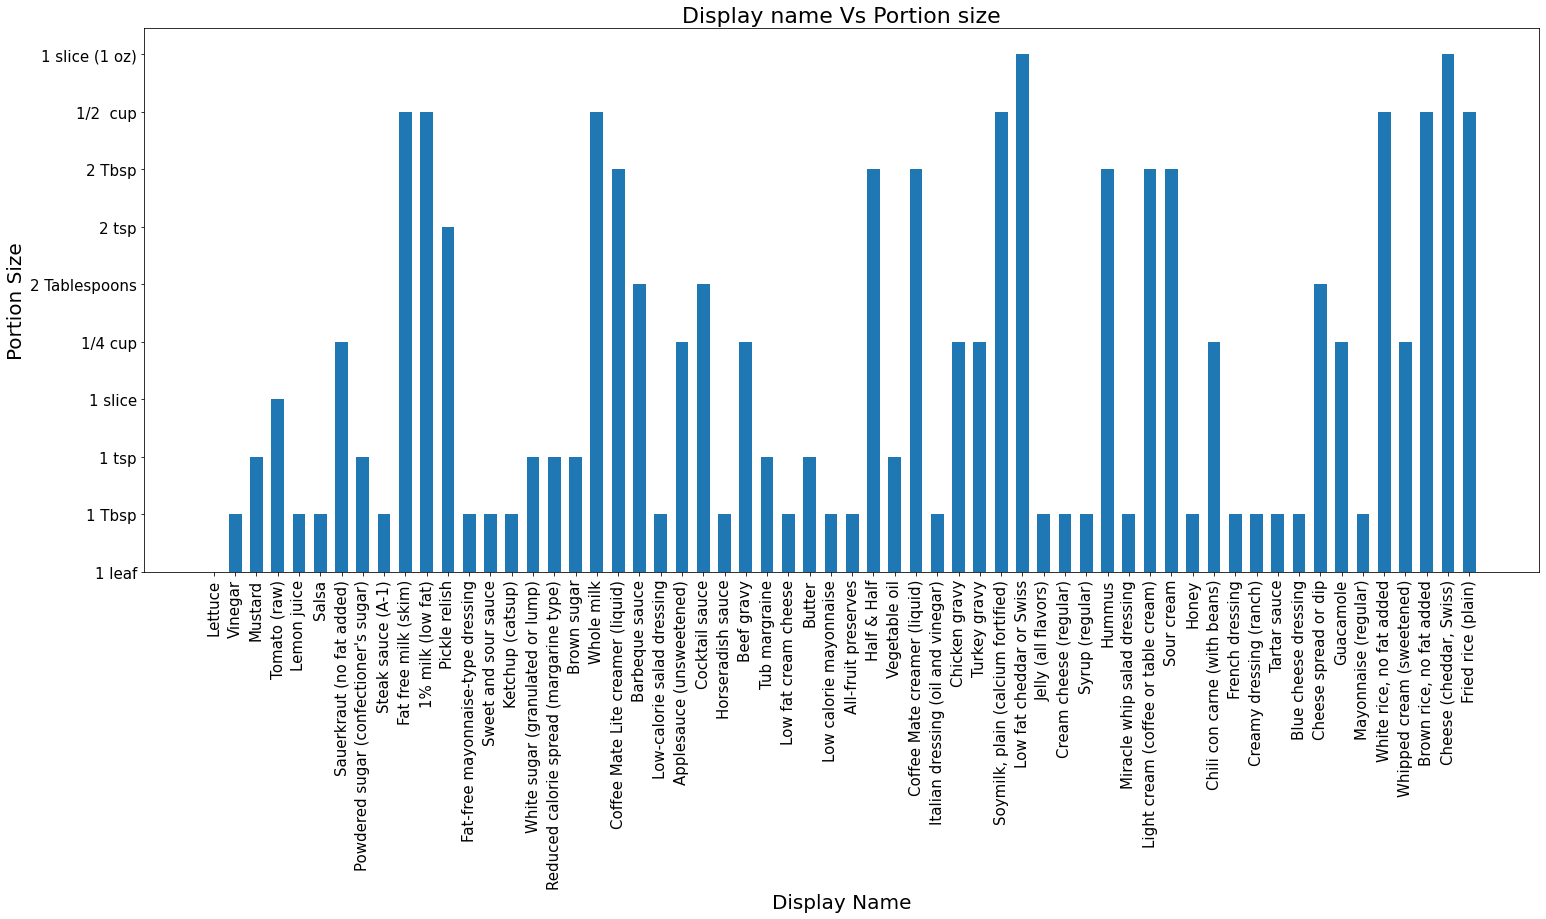

In [42]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (25,10))
x= df_data_0['Display Name']
y= df_data_0['Portion Size']

plt.bar(x, y, width= 0.6)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Display Name", fontsize=20)
plt.ylabel("Portion Size", fontsize=20)
plt.title("Display name Vs Portion size", fontsize=22)


### Display name Vs Condiment grains

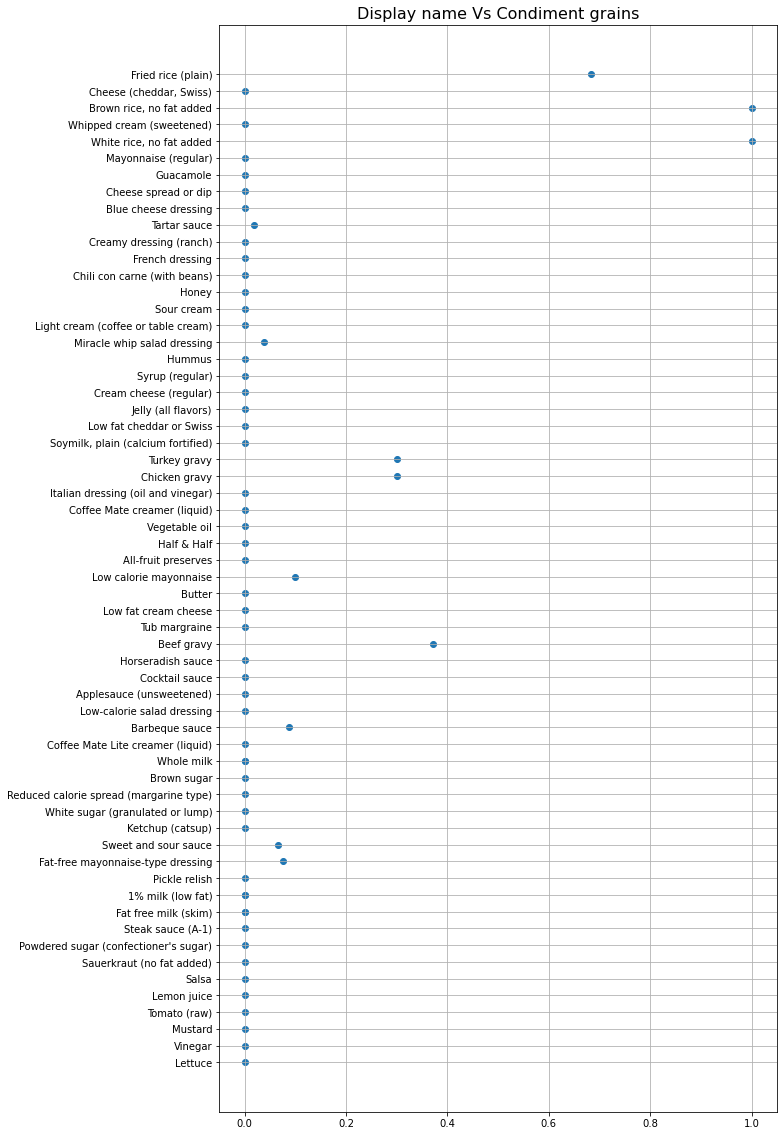

In [44]:
fig,ax = plt.subplots(figsize = (10,20))
data= df_data_0["Condiment Grains"]
labels= df_data_0["Display Name"]
plt.scatter(data, labels)
plt.grid(which= "both")
plt.title('Display name Vs Condiment grains', fontsize= 16)
plt.show()

### Display name Vs Condiment calories

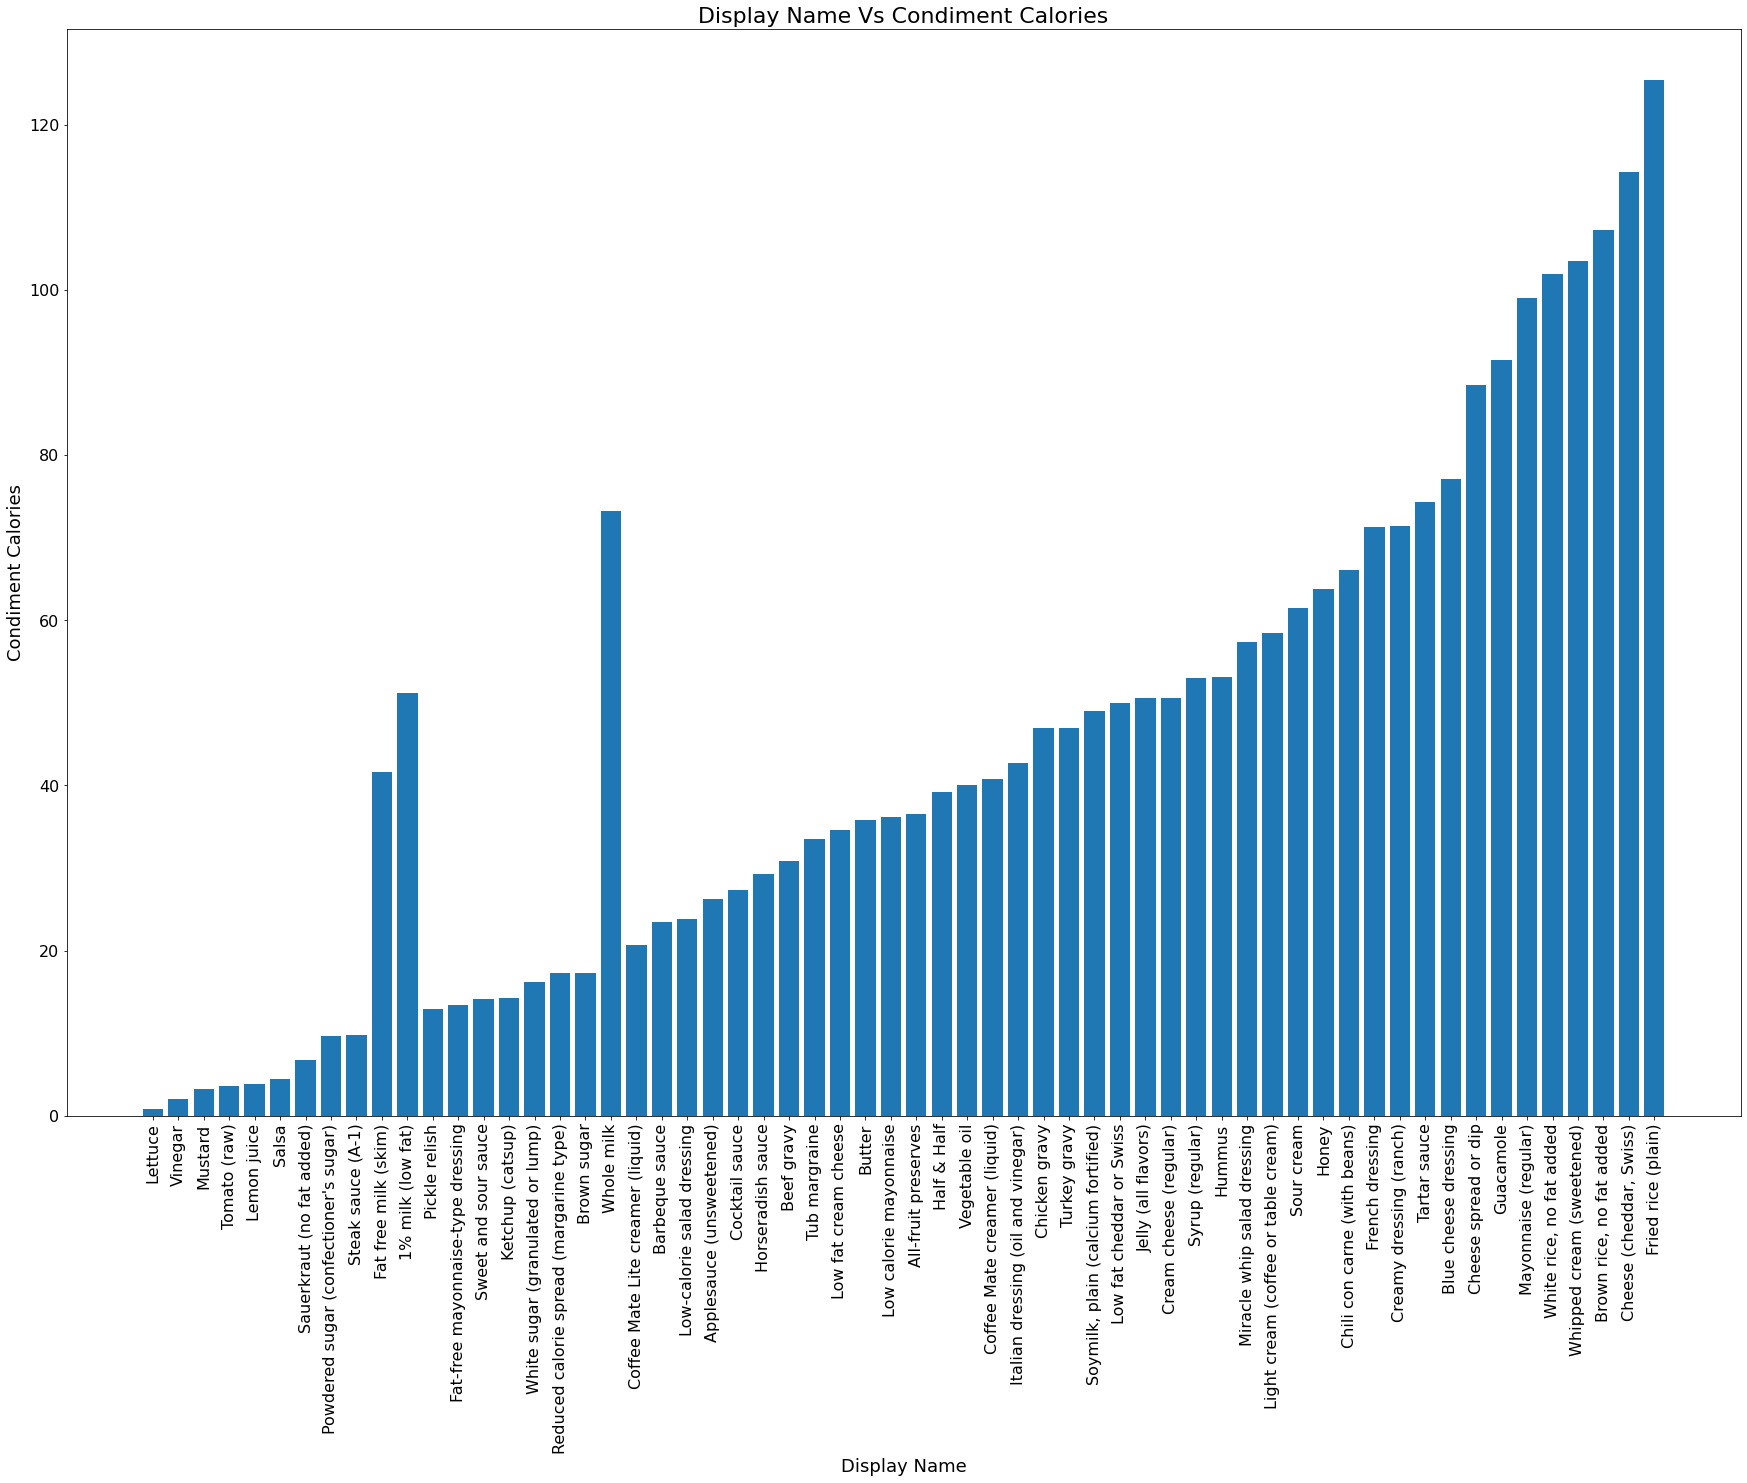

In [46]:
fig,ax = plt.subplots(figsize = (30,20))
x= df_data_0['Display Name']
y= df_data_0['Calories']
plt.bar(x, y)
plt.xlabel("Display Name", fontsize= 18)
plt.ylabel("Condiment Calories", fontsize= 18)
plt.title("Display Name Vs Condiment Calories", fontsize=22)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

plt.show()

### Display name Vs Condiment oils

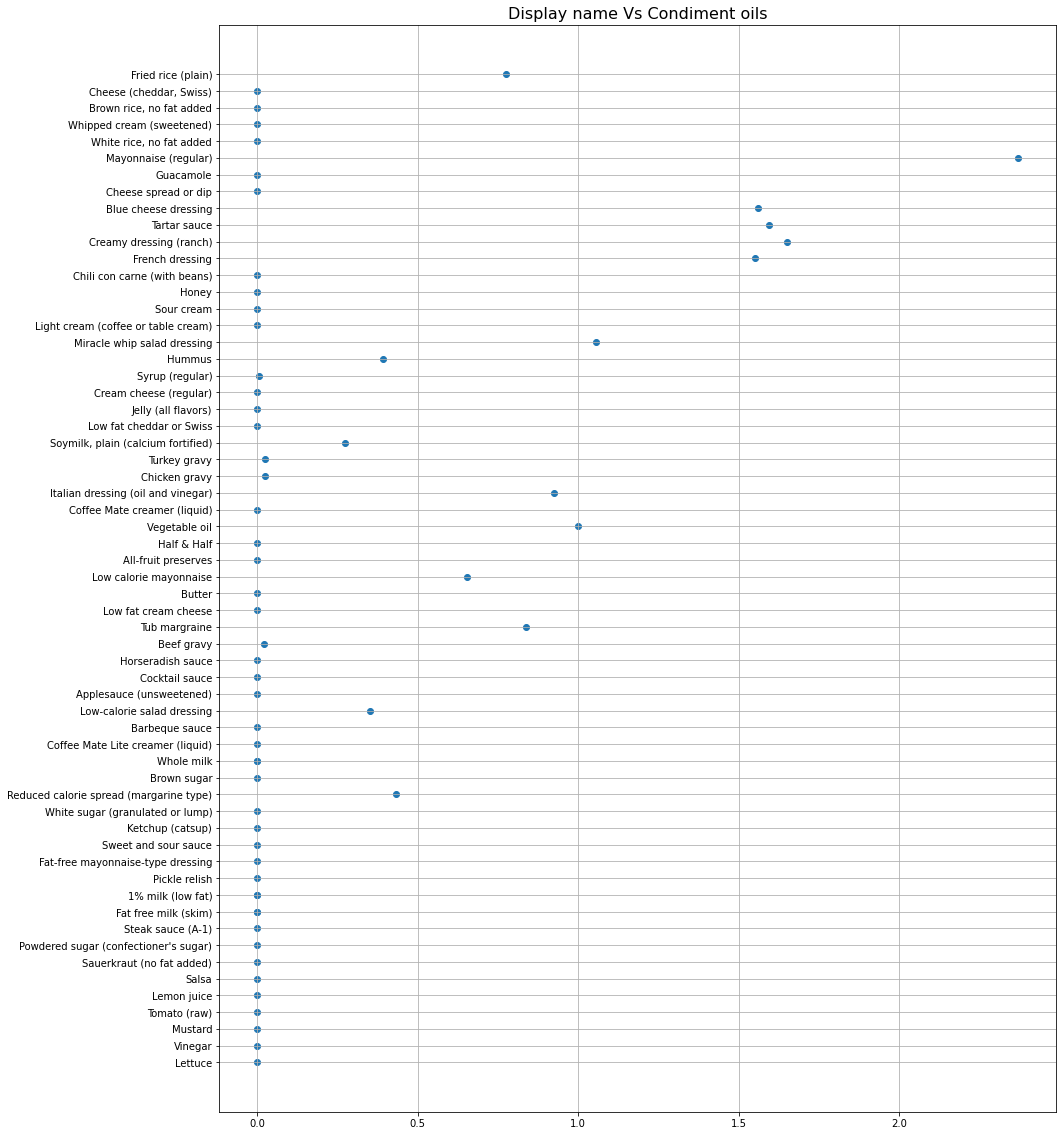

In [47]:
fig,ax = plt.subplots(figsize = (15,20))
data= df_data_0["Oils"]
labels= df_data_0["Display Name"]
plt.scatter(data, labels)
plt.grid(which= "both")
plt.title('Display name Vs Condiment oils', fontsize= 16)
plt.show()